# Filenames

In [24]:

output_dir_prefix = "output/A100/"

baseline_variants_patch16 = {
    "deit_small_patch16_LS" : "APE",
    "rope_mixed_deit_small_patch16_LS" : "RoPE-Mixed",
    "cayleySTRING_regular_deit_small_patch16_LS"   : "Cayley-STRING",
    "cayleySTRING_reflection_deit_small_patch16_LS" : "Cayley-STRING Reflection",
    "cayleySTRING_sparse_learnable_deit_small_patch16_LS_USE_sparse_constraint" : "Cayley-STRING Sparse (f=learnable)",
    # also include the fixed f variant w optimal accuracy!
    "cayleySTRING_sparse_fixed35pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=35 pct)",

}

sparse_fixed_f_variants = {
    "cayleySTRING_sparse_fixed5pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=5 pct)",
    "cayleySTRING_sparse_fixed10pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=10 pct)",
    "cayleySTRING_sparse_fixed15pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=15 pct)",
    "cayleySTRING_sparse_fixed20pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=20 pct)",
    "cayleySTRING_sparse_fixed25pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=25 pct)",
    "cayleySTRING_sparse_fixed30pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=30 pct)",
    "cayleySTRING_sparse_fixed35pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=35 pct)",
    "cayleySTRING_sparse_fixed40pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=40 pct)",
    "cayleySTRING_sparse_fixed45pct_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=45 pct)",
}

sparse_learnable_variants = {
    "cayleySTRING_sparse_learnable_deit_small_patch16_LS_USE_sparse_constraint": "Cayley-STRING Sparse (f=learnable)",
    "cayleySTRING_sparse_learnable_deit_small_patch16_LS" : "Cayley-STRING Sparse (f=learnable, no sparsity constraint)",
}


eval_file = "eval.txt"
log_file = "log.txt"
training_time_file = "training_time.txt"

eval_input_sizes_16 = [224]
eval_input_sizes_8 = [224]

datasets = ["CIFAR10", "MNIST"]
patch_sizes = ["patch16"]

In [4]:
import matplotlib.pyplot as plt
import json
import numpy as np

# Validation Loss Curves

In [28]:
def val_loss_curves(model_dict):
    for dataset in datasets: 
        fig = plt.figure(figsize=(20,5))
        axes = fig.add_subplot(1,2,1)
        for model_name, model_label in model_dict.items():
            log_filepath = output_dir_prefix + dataset + "/" + model_name + "/" + log_file
            print(log_filepath)
            with open(log_filepath) as f:
                log_data = f.read()

            # reconstructing data as a dictionary
            log_data = "[" + log_data.replace("}", "},\n").strip(",\n") + "]"

            # Parse the corrected JSON
            log_data = json.loads(log_data)
            
            filtered_log_data = {}
            epoch = 0
            for log_dict in log_data:
                # need to manually correct if there are repeated epochs
                assert epoch == log_dict["epoch"] 
                test_loss =  log_dict["test_loss"]

                filtered_log_data[log_dict["epoch"]] = test_loss
                epoch += 1

            filtered_log_data = dict(sorted(filtered_log_data.items()))

            # Plot eval
            epochs = list(filtered_log_data.keys())
            val_loss_ls = list(filtered_log_data.values())
            axes.plot(epochs,val_loss_ls,'-',label=model_label, linewidth=2) 

        axes.legend(loc='best')
        axes.set_xlabel("Epoch")
        axes.set_ylabel("Validation Loss")
        axes.set_title(f"{dataset} ViT-S Transformer Validation Loss (Patch Size 16)")


        axes.grid()
    plt.show()   


output/A100/CIFAR10/deit_small_patch16_LS/log.txt
output/A100/CIFAR10/rope_mixed_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_regular_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_reflection_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_learnable_deit_small_patch16_LS_USE_sparse_constraint/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed35pct_deit_small_patch16_LS/log.txt
output/A100/MNIST/deit_small_patch16_LS/log.txt
output/A100/MNIST/rope_mixed_deit_small_patch16_LS/log.txt
output/A100/MNIST/cayleySTRING_regular_deit_small_patch16_LS/log.txt
output/A100/MNIST/cayleySTRING_reflection_deit_small_patch16_LS/log.txt
output/A100/MNIST/cayleySTRING_sparse_learnable_deit_small_patch16_LS_USE_sparse_constraint/log.txt
output/A100/MNIST/cayleySTRING_sparse_fixed35pct_deit_small_patch16_LS/log.txt


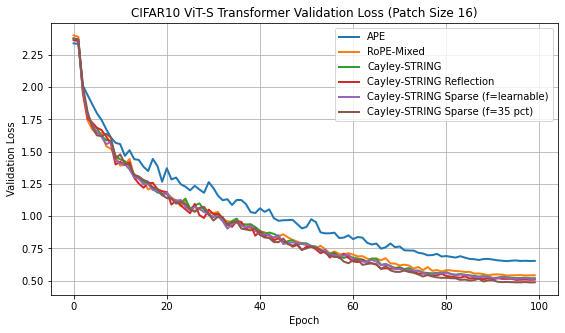

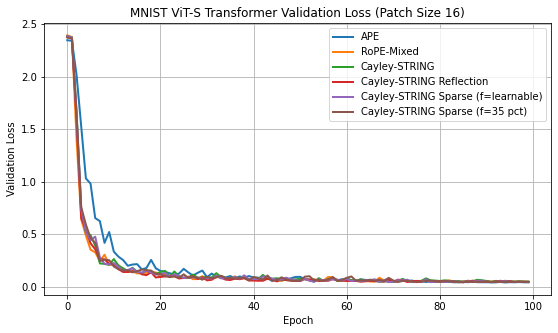

In [29]:
val_loss_curves(baseline_variants_patch16)

output/A100/CIFAR10/cayleySTRING_sparse_fixed5pct_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed10pct_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed15pct_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed20pct_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed25pct_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed30pct_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed35pct_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed40pct_deit_small_patch16_LS/log.txt
output/A100/CIFAR10/cayleySTRING_sparse_fixed45pct_deit_small_patch16_LS/log.txt
output/A100/MNIST/cayleySTRING_sparse_fixed5pct_deit_small_patch16_LS/log.txt
output/A100/MNIST/cayleySTRING_sparse_fixed10pct_deit_small_patch16_LS/log.txt
output/A100/MNIST/cayleySTRING_sparse_fixed15pct_deit_small_patch16_LS/log.txt
output/A100/MNIST/cayleySTRING_spars

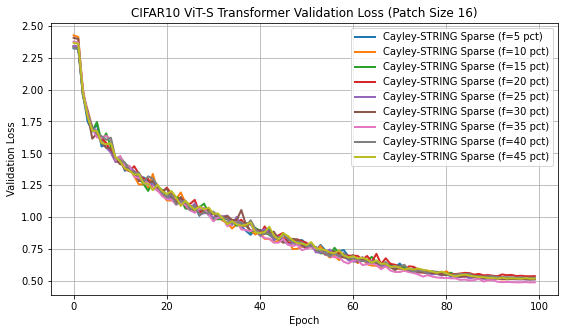

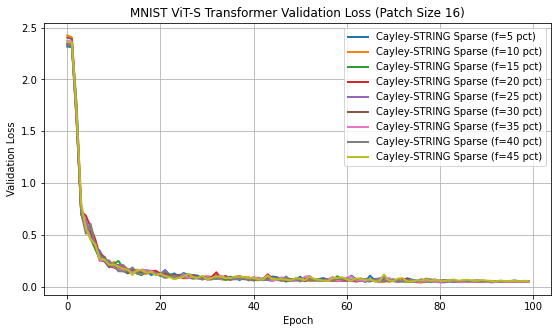

In [31]:
val_loss_curves(sparse_fixed_f_variants)

# Accuracy

In [17]:
def accuracy_plots(model_dict, figsize=(6, 4), scale_x=1.5, scale_y=2.5):
    accuracy_contents = []
    rows = []

    for model_name, model_label in model_dict.items():
        model_accuracies = []
        for dataset in datasets:
            eval_filepath = output_dir_prefix + dataset + "/" + model_name + "/" + eval_file
            try:
                with open(eval_filepath) as f:
                    eval_data = f.read()

                # reconstructing data as a dictionary
                eval_data = "[" + eval_data.replace("}", "},\n").strip(",\n") + "]"

                # Parse the corrected JSON
                eval_data = json.loads(eval_data)

                acc1_found = False
                for eval_dict in eval_data:
                    # only include valid eval (100 epochs)
                    if (eval_dict["epochs"] == 100) and (eval_dict["input_size"] == 224): 
                        acc1 = eval_dict["acc1"]
                        # Remove % sign if present
                        if isinstance(acc1, str):
                            acc1 = acc1.rstrip("%")
                        model_accuracies.append(f"{float(acc1):.2f}%")
                        acc1_found = True
                        break
                if not acc1_found:
                    model_accuracies.append("N/A")
            except:
                model_accuracies.append("N/A")
        
        accuracy_contents.append(model_accuracies)
        rows.append(model_label)

    # setup table with accuracy
    cols = datasets

    fig, axs = plt.subplots(figsize=figsize)

    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows))) 
    n_rows = len(accuracy_contents) 

    # Plot line plots and create text labels  
    # for the table 
    cell_text = [] 
    for row in range(n_rows): 
        y_offset = accuracy_contents[row] 
        cell_text.append(y_offset) 

    # Reverse colors and text labels to display 
    # the last value at the top. 
    colors = colors[::-1] 

    # Add a table at the bottom of the axes 
    table = axs.table(cellText=cell_text, 
                        rowLabels=rows, 
                        rowColours=colors, 
                        colLabels=cols, 
                        loc='center',
                        cellLoc='center') 

    # Increase cell padding and height
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(scale_x, scale_y)

    # Adjust layout to make room for the table: 
    axs.axis('off')
    axs.axis('tight')
    axs.set_title(f'ViT-S Accuracy (100 epochs, patch size 16)',loc='left', fontsize=14) 

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1818096/3082632740.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


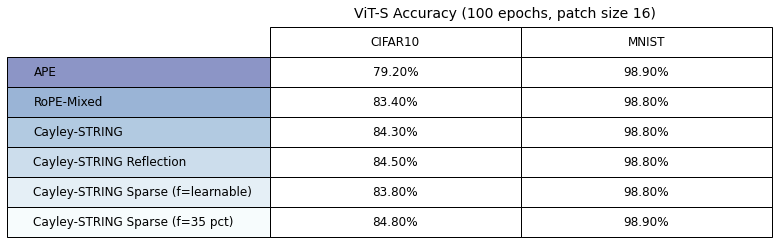

In [32]:
accuracy_plots(baseline_variants_patch16)

# Training Speed

In [37]:
def training_speed_plot(model_dict, figsize=(6, 4), scale_x=1.5, scale_y=2.5):
    training_speed_contents = []
    rows = []

    for model_name, model_label in model_dict.items():
        model_training_times = []
        for dataset in datasets:
            training_filepath = output_dir_prefix + dataset + "/" + model_name + "/" + training_time_file
            try:
                with open(training_filepath) as f:
                    training_speed_data = f.read()

                # reconstructing data as a dictionary
                training_speed_data = "[" + training_speed_data.replace("}", "},\n").strip(",\n") + "]"

                # Parse the corrected JSON
                training_speed_data = json.loads(training_speed_data)

                time_found = False
                for training_speed_dict in training_speed_data:
                    # only include valid training (100 epochs)
                    if (training_speed_dict["end_epoch"] == 100) and (training_speed_dict["start_epoch"] == 0): 
                        model_training_times.append(training_speed_dict["training_time_str"])
                        time_found = True
                        break
                if not time_found:
                    model_training_times.append("N/A")
            except:
                model_training_times.append("N/A")
        
        training_speed_contents.append(model_training_times)
        rows.append(model_label)

    # setup table with training speed
    cols = datasets

    fig, axs = plt.subplots(figsize=figsize)

    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows))) 
    n_rows = len(training_speed_contents) 

    # Plot line plots and create text labels  
    # for the table 
    cell_text = [] 
    for row in range(n_rows): 
        y_offset = training_speed_contents[row] 
        cell_text.append(y_offset) 

    # Reverse colors and text labels to display 
    # the last value at the top. 
    colors = colors[::-1] 

    # Add a table at the bottom of the axes 
    table = axs.table(cellText=cell_text, 
                        rowLabels=rows, 
                        rowColours=colors, 
                        colLabels=cols, 
                        loc='center',
                        cellLoc='center') 

    # Increase cell padding and height
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(scale_x, scale_y)

    # Adjust layout to make room for the table: 
    axs.axis('off')
    axs.axis('tight')
    axs.set_title(f'ViT-S Training Speed (100 epochs, patch size 16)',loc='left', fontsize=14) 

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1818096/2070608155.py:71: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


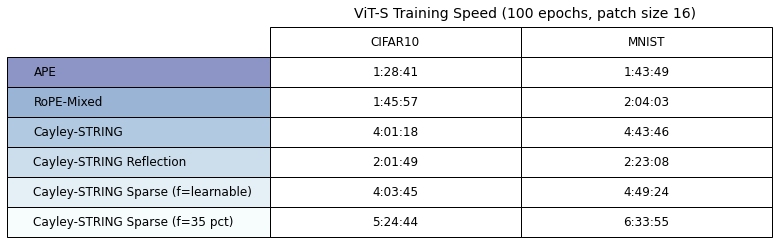

In [38]:
training_speed_plot(baseline_variants_patch16)

# Inference Speed

In [41]:
def inference_speed_plot(model_dict, figsize=(6, 6), scale_x=2.0, scale_y=2.5):
    inference_speed_contents = []
    rows = []

    for model_name, model_label in model_dict.items():
        model_inference_times = []
        for dataset in datasets:
            eval_filepath = output_dir_prefix + dataset + "/" + model_name + "/" + eval_file
            try:
                with open(eval_filepath) as f:
                    inference_speed_data = f.read()

                # reconstructing data as a dictionary
                inference_speed_data = "[" + inference_speed_data.replace("}", "},\n").strip(",\n") + "]"

                # Parse the corrected JSON
                inference_speed_data = json.loads(inference_speed_data)

                time_found = False
                for inference_speed_dict in inference_speed_data:
                    # only include valid training (100 epochs)
                    if (inference_speed_dict["epochs"] == 100): 
                        model_inference_times.append(inference_speed_dict["eval_time_str"])
                        time_found = True
                        break
                if not time_found:
                    model_inference_times.append("N/A")
            except:
                model_inference_times.append("N/A")
        
        inference_speed_contents.append(model_inference_times)
        rows.append(model_label)

    # setup table with inference speed
    cols = datasets

    fig, axs = plt.subplots(figsize=figsize)

    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows))) 
    n_rows = len(inference_speed_contents) 

    # Plot line plots and create text labels  
    # for the table 
    cell_text = [] 
    for row in range(n_rows): 
        y_offset = inference_speed_contents[row] 
        cell_text.append(y_offset) 

    # Reverse colors and text labels to display 
    # the last value at the top. 
    colors = colors[::-1] 

    # Add a table at the bottom of the axes 
    table = axs.table(cellText=cell_text, 
                        rowLabels=rows, 
                        rowColours=colors, 
                        colLabels=cols, 
                        loc='center',
                        cellLoc='center') 

    # Increase cell padding and height
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(scale_x, scale_y)

    # Adjust layout to make room for the table: 
    axs.axis('off')
    axs.axis('tight')
    axs.set_title(f'ViT-S Inference Speed (100 epochs, patch size 16)',loc='left', fontsize=14) 

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1818096/578917821.py:71: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


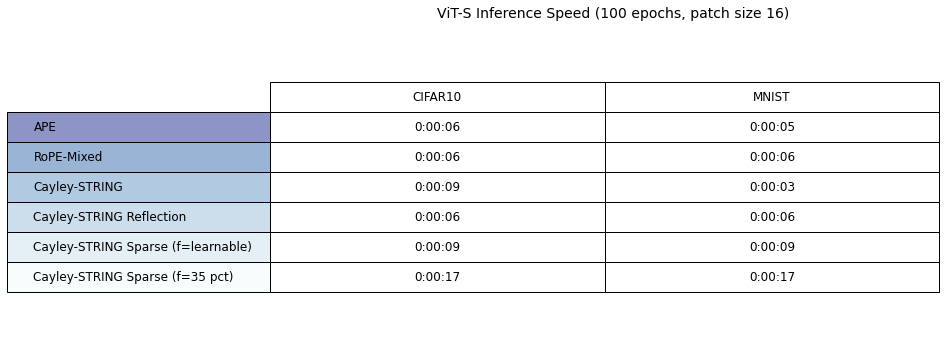

In [42]:
inference_speed_plot(baseline_variants_patch16)

# Sparse Variant (fixed f)

## Accuracy

/tmp/ipykernel_1818096/3082632740.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


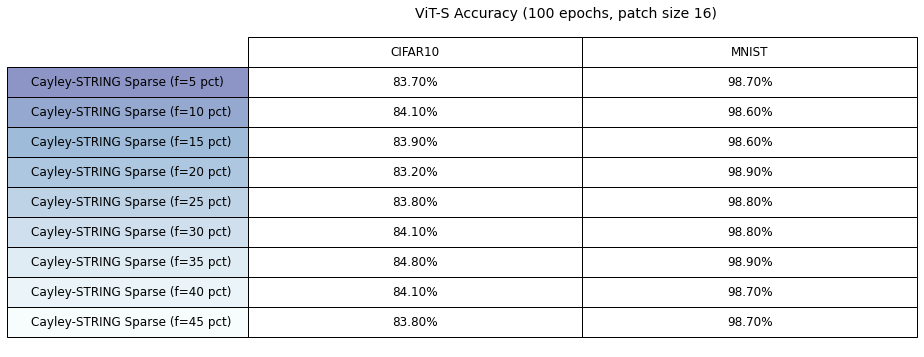

In [23]:
accuracy_plots(sparse_fixed_f_variants, figsize=(6, 6), scale_x=2.0, scale_y=2.5)

## Training Speed

/tmp/ipykernel_1818096/2070608155.py:71: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


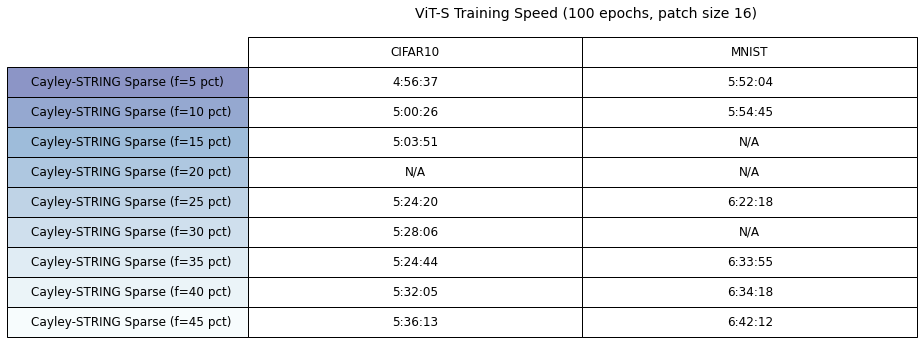

In [40]:
training_speed_plot(sparse_fixed_f_variants, figsize=(6, 6), scale_x=2.0, scale_y=2.5)

## Inference Speed

/tmp/ipykernel_1818096/578917821.py:71: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


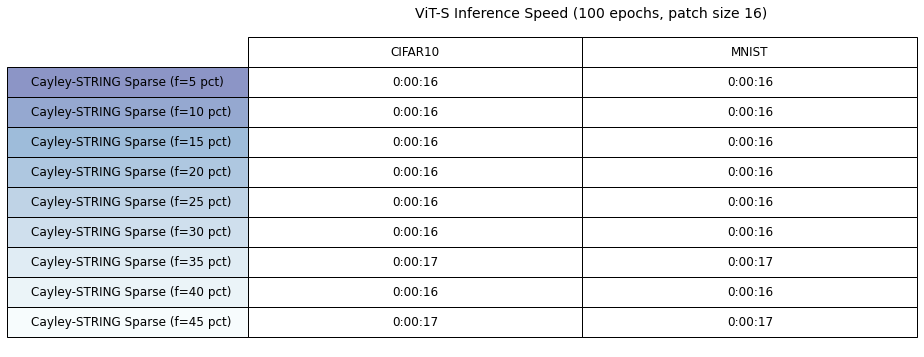

In [43]:
inference_speed_plot(sparse_fixed_f_variants, figsize=(6, 6), scale_x=2.0, scale_y=2.5)